<a href="https://colab.research.google.com/github/CodyCarlock/FirstTwitterMLR/blob/main/Checkpoint_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [ ]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [ ]:
# Question 1: Import the datafile tw_tweets_users_media_places.csv that was 
# provided with this checkpoint. Set tweet_id as the index. Print the number 
# of records in this dataset in the output. How many records are there?

import pandas as pd, numpy as np
import seaborn as sns, statsmodels.api as sm
import datetime as dt

df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tw_tweets_users_media_places.csv')
df.set_index('tweet_id', inplace=True)
print(len(df))
df





534


,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,2012-10-27T02:37:45.000Z,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2014-02-18T21:25:52.000Z,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377395135898656768,Save The Date! Returning this year is is our @...,0,0.0,0.0,0.0,0.0,1.0,2021-03-31T22:59:25.000Z,en,12,0,0,1,everyone,6,Twitter for iPhone,"""social distancing""%20autism",HuntsPointVLTRS,2018-08-16T20:05:28.000Z,284,124,1285,0,NaN,False,False,photo,1024,686,https://pbs.twimg.com/media/Ex19kv4WUAI8WkG.jpg,United States,NYPD - 41st Precinct,poi
1303435852551462912,"Join SAFE, Paws For A Cause 4 Autism and All O...",1,0.0,0.0,0.0,0.0,1.0,2020-09-08T20:51:38.000Z,en,1,0,0,0,everyone,1,Twitter for iPhone,"""social distancing""%20autism",autism_SAFE,2016-08-23T20:19:35.000Z,354,370,97,5,"Plains, PA",False,False,photo,2048,1582,https://pbs.twimg.com/media/Eha7_r_WkAACJDK.jpg,United States,Hilldale,city
1246527727563345920,Today we have two reasons for celebration. Fir...,10,2.0,0.0,0.0,0.0,1.0,2020-04-04T19:59:04.000Z,en,1,0,0,0,everyone,0,Twitter for Android,"""social distancing""%20autism",patrykfaff,2011-06-11T00:52:58.000Z,9,28,43,0,NaN,False,False,photo,2048,1152,https://pbs.twimg.com/media/EUyOW1JXgAEnGWZ.jpg,United Kingdom,Middleton,city


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Question 2: Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output. Print
# the first five records of this reduced dataset.

df_num = df.select_dtypes(np.number)
print(df_num.columns)
df_num.head()

Index(['context_annotations_count', 'count_annotations', 'count_cashtags',
       'count_hashtags', 'count_mentions', 'count_urls', 'likes', 'quotes',
       'referenced_tweet_count', 'replies', 'retweets', 'followers_count',
       'following_count', 'tweet_count', 'listed_count', 'height', 'width'],
      dtype='object')


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width
tweet_id,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048


In [ ]:
# Question 3: Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model. Print out the model results summary.

y = df_num['retweets']
X = df_num.drop(columns=['likes','quotes','replies','retweets']).assign(const=1)
model= sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.81e-05
Time:                        16:51:52   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [ ]:
# Question 4: Add the scored (i.e. predicted) values for every record 
# back into the original dataframe using the column label "model_1". Print
# the first five records.

df_num['model_1'] = model.fittedvalues
df_num.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width,model_1
tweet_id,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813,6.395809
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536,2.022634
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278,5.030170
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048,1.159034
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048,1.159034


In [ ]:
from numpy.ma.extras import average
# Question 5: Calculate and/or print the following five metrics for the 
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE, 
# MAE, and mean of the label column. 

def mlr_fit(results, actual):
  residuals = np.array(actual) - np.array(model.fittedvalues)
  rmse = np.sqrt(sum((residuals**2))/len(actual))

  mae = np.mean(abs(np.array(actual) - np.array(model.fittedvalues)))

  metrics  = "R-squared:\t" + str(round(model.rsquared, 4)) + "\n"
  metrics += "R2-adjusted:\t" + str(round(model.rsquared_adj, 4)) + "\n"
  metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
  metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
  metrics += "Label mean:\t" + str(round(np.mean(actual), 4))

  return metrics

print(mlr_fit(model, df['retweets']))


R-squared:	0.0761
R2-adjusted:	0.0549
RMSE:		18.9346
MAE:		5.1594
Label mean:	3.9007


In [ ]:
import datetime

# Question 6: We need to improve the model fit so that our predictions will
# be more accurate. Let's begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and 
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. Do not put these values into new 
# columns. Replace the existing dates with those values. 

# HINT: First, cast those columns to dt.date data types. Second, there are
# many ways to calculate the number of days until January 1, 2022. But I 
# used the strptime() method of the datetime package to cast "2022-1-1" 
# into a date, subtract the column value from that date, and then return 
# the result in days (.dt.days). 

# Print the first five records of this new dataset.

df['created_at_tweet'] = pd.to_datetime(df['created_at_tweet'])
df['created_at_author'] = pd.to_datetime(df['created_at_author'])
date = datetime.datetime(2022,1,1,0,0,0,0,datetime.timezone.utc)
df['created_at_tweet'] = (date - df['created_at_tweet']).dt.days
df['created_at_author'] = (date - df['created_at_author']).dt.days


print(df['created_at_tweet'])
print(df['created_at_author'])


tweet_id
1440484799970304000    100
1439618825171963904    103
1248872872837332992    629
1250729294051053568    624
1249612131433095168    627
                      ... 
1377395135898656768    275
1303435852551462912    479
1246527727563345920    636
1239010870128041984    656
1264967572174274560    585
Name: created_at_tweet, Length: 534, dtype: int64
tweet_id
1440484799970304000    3352
1439618825171963904    2873
1248872872837332992    3651
1250729294051053568    3651
1249612131433095168    3651
                       ... 
1377395135898656768    1233
1303435852551462912    1956
1246527727563345920    3856
1239010870128041984    4860
1264967572174274560    4159
Name: created_at_author, Length: 534, dtype: int64


In [ ]:
# Question 7: Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'. 

# Print out the results summary.

# HINT: Do not forget that if you are using the same DataFrame that contained
# the 'model_1' predicted values column, you will need to drop that column as 
# well. Otherwise, you are creating a new model to predict retweet count using
# a predicted value of retweet count from a prior model run which doesn't make
# any sense. However, you may have created a copy of the DataFrame in some 
# prior task so that 'model_1' is not even in the DataFrame you are using now. 
# In that case, this HINT is irrelevant.

y= df['retweets']
X = df.select_dtypes(np.number).assign(const=1)
X.drop(columns=['likes','quotes','replies','retweets'], inplace=True)
model= sm.OLS(y,X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           6.40e-05
Time:                        16:51:52   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [ ]:
# Question 8: Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model. 


print(mlr_fit(model, df['retweets']))

R-squared:	0.08
R2-adjusted:	0.0552
RMSE:		18.8947
MAE:		5.2569
Label mean:	3.9007


In [ ]:
# Question 9: We want to improve model fit even further by generating 
# dummy codes for some of the categorical features that do not have too many 
# group values like 'text' and 'url' do. In particular, generate dummy 
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining 
# non-numeric features as well as the alternative labels 'likes', 'quotes', 
# and 'replies'. As in #7, make sure you are not including the 'model_1' 
# column of predicted values. Do not train the model again yet. You are 
# just creating the dummy codes in this step.

# Print out the first five records after the dummy codes are created.

df = pd.get_dummies(df, columns=['lang','reply_settings','source','protected','verified','terms'],drop_first=True).assign(const=1)
df = df.select_dtypes(np.number)
df.drop(columns=['likes','quotes','replies'], inplace=True)
df.head()


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,retweets,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,lang_en,lang_es,lang_fr,lang_in,lang_it,lang_tr,lang_und,reply_settings_mentionedUsers,source_Hootsuite Inc.,source_Sprout Social,source_Twitter for Android,source_Twitter for iPad,source_Twitter for iPhone,source_dlvr.it,verified_True,"terms_""social distancing""%20autistic",terms_corona%20autism,terms_corona%20autistic,terms_coronavirus%20autism,terms_coronavirus%20autistic,"terms_covid%20""sensory overload""","terms_covid%20""sensory processing""",terms_covid%20autism,terms_covid%20autistic,terms_covid-19%20autism,terms_covid-19%20autistic,terms_covid19%20autism,terms_covid19%20autistic,"terms_lockdown%20""sensory overload""",terms_lockdown%20autism,terms_lockdown%20autistic,"terms_pandemic%20""sensory overload""",terms_pandemic%20autism,terms_pandemic%20autistic,"terms_quarantine%20""sensory overload""",terms_quarantine%20autism,terms_quarantine%20autistic,terms_quarantine%20neurotypical,const
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,100,0,0,3352,2709,4999,96,15,405,813,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,103,0,0,2873,140,735,99,0,2048,1536,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,629,0,20,3651,7510,7260,100,103,288,278,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,624,0,1,3651,7510,7260,100,103,2048,2048,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,627,0,21,3651,7510,7260,100,103,2048,2048,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Question 10: Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we 
# created previously. Print out the results summary.
X = df.select_dtypes(np.number)
X.drop(columns=['retweets'], inplace=True)
model_dummies = sm.OLS(y,X).fit()
print(model_dummies.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.643
Date:                Thu, 10 Feb 2022   Prob (F-statistic):            0.00436
Time:                        16:51:52   Log-Likelihood:                -2305.7
No. Observations:                 534   AIC:                             4717.
Df Residuals:                     481   BIC:                             4944.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# Question 11: Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the 
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.


def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression

  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df:
    y = df[col]
    X = df.drop(columns=[col])

    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    vif = 1/(1 - r_squared)
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

  return pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

vif_df = df.select_dtypes(np.number)
vif_df = vif_df.drop(columns=['retweets'])
vif(vif_df).sort_values(by=['VIF'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


,VIF,Tolerance
const,inf,0.000000
count_mentions,inf,0.000000
source_Twitter for iPhone,133.680849,0.007481
source_Twitter for Android,128.646692,0.007773
listed_count,23.630154,0.042319
followers_count,21.414096,0.046698
lang_en,21.285836,0.046980
lang_und,13.405972,0.074594
source_Twitter for iPad,12.328201,0.081115
source_Hootsuite Inc.,5.200767,0.192279


In [ ]:
# Question 12: We need to eliminate those features with excessive multi-collinearity. 
# However, this may happen naturally as we remove those features with large p-values. 
# Therefore, start by removing the feature with the highest p-value and then rerun 
# the prior model. One-at-a-time, continue removing the feature with the highest p-value 
# (rerunning the model each time) until the difference between R-squared and R-squared
# adjusted is <= 0.01 (rounded). 

# Why would we do this? Because when R-squared adjusted is significantly lower than 
# R-squared, we have too many variables in the model that are not significantly 
# contributing to model fit. Once more, remove the highest p-value feature one-at-a-time
# until R-squared minus R-squared adjusted is <= 0.01 (rounded). You do NOT need to keep
# the results summary of every model. You can overwrite the prior model summary each time
# until you meet the criterion.

model_dummies=sm.OLS(y,X).fit()

# def mlr_fit(model_dummies, actual):
#   import numpy as np
#   Rsquared  = round(model_dummies.rsquared, 4)
#   RsquaredAdj = round(model_dummies.rsquared_adj, 4)
#   return Rsquared - RsquaredAdj

# diff = mlr_fit(model_dummies,y)

# while diff > .01 :
#   i = 0
#   for name in model_dummies.pvalues :
#     if (name == max(model_dummies.pvalues)) :    
#       col = X.columns[i]
#       break
#     i += 1
#   X.drop(columns=col, inplace=True)
#   model_dummies = sm.OLS(y, X).fit()
#   diff = mlr_fit(model_dummies, y)

# print(model_dummies.summary())


diff = abs(model_dummies.rsquared - model_dummies.rsquared_adj)
while diff > .01:
  X.drop(columns=[model_dummies.pvalues.sort_values(ascending=False).index[0]], axis=1, inplace=True)
  model_dummies = sm.OLS(y,X).fit()
  diff = abs(model_dummies.rsquared - model_dummies.rsquared_adj)

print(model_dummies.summary())



                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     13.55
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.87e-12
Time:                        16:51:54   Log-Likelihood:                -2317.1
No. Observations:                 534   AIC:                             4646.
Df Residuals:                     528   BIC:                             4672.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
created_at_tweet    

In [ ]:
# Question 13: For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.


vif_df = X
vif_df.drop(columns=['const'], inplace=True)
vif(vif_df).sort_values(by=['VIF'], ascending=False)

,VIF,Tolerance
terms_coronavirus%20autism,1.058081,0.945108
terms_covid19%20autism,1.032721,0.968316
created_at_tweet,1.029342,0.971494
followers_count,1.007981,0.992082
source_Twitter for iPad,1.001620,0.998383


In [ ]:
# Question 14: Now we have a nice and trim model. However, we cannot 
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.

from sklearn import preprocessing
X['retweets'] = y
#X.drop(columns=['const'],inplace=True)
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns, index=X.index)
df_minmax.head()




,created_at_tweet,followers_count,source_Twitter for iPad,terms_coronavirus%20autism,terms_covid19%20autism,retweets
tweet_id,,,,,,
1440484799970304000,0.000000,0.004192,0.0,0.0,0.0,0.000000
1439618825171963904,0.005300,0.000217,0.0,0.0,0.0,0.000000
1248872872837332992,0.934629,0.011620,0.0,0.0,0.0,0.060606
1250729294051053568,0.925795,0.011620,0.0,1.0,0.0,0.003030
1249612131433095168,0.931095,0.011620,0.0,1.0,0.0,0.063636


In [ ]:
# Question 15: Rerun your last model using the normalized values. Print
# the results summary.
X=df_minmax
X = X.assign(const=1)
X.drop(columns=['retweets'],inplace=True)

model_minmax = sm.OLS(y,X).fit()
print(model_minmax.summary())



                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     13.55
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.87e-12
Time:                        16:51:54   Log-Likelihood:                -2317.1
No. Observations:                 534   AIC:                             4646.
Df Residuals:                     528   BIC:                             4672.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
created_at_tweet    

Retweets: 13.297247408656315


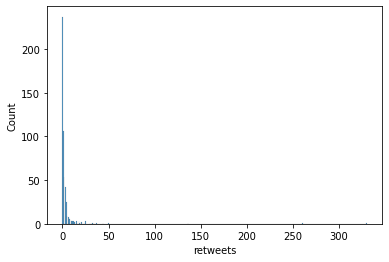

In [ ]:
# Question 16: Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.
import seaborn as sns
print("Retweets: " + str(y.skew()))
sns.histplot(y)


Retweets(ln+1): 1.572517196447617


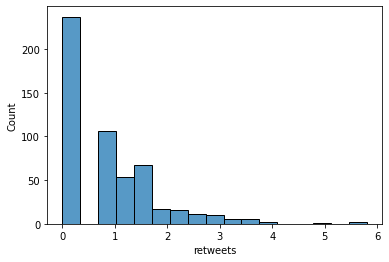

In [ ]:
# Question 17: The skewness of retweets is clearly very extreme. However, we cannot 
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log. 
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets' 
# label to a natural log +1. Print out the new skewness and histogram.

y=np.log1p(df['retweets'])
print("Retweets(ln+1): " + str(y.skew()))
sns.histplot(y)


In [ ]:
# Question 18: Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.

model_trans = sm.OLS(y,X).fit()
print(model_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     17.42
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           5.55e-16
Time:                        16:51:55   Log-Likelihood:                -682.71
No. Observations:                 534   AIC:                             1377.
Df Residuals:                     528   BIC:                             1403.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
created_at_tweet    